In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.shape

(1000000, 8)

# About Dataset
Digital payments are evolving, but so are cyber criminals.

According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

This Dataset sourced by some unnamed institute.

# Feature Explanation:

distancefromhome - the distance from home where the transaction happened.

distancefromlast_transaction - the distance from last transaction happened.

ratiotomedianpurchaseprice - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

usedpinnumber - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

# Data Cleaning

In [6]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [8]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [9]:
df[['fraud','online_order','used_pin_number']].groupby(['fraud','online_order','used_pin_number']).size()

fraud  online_order  used_pin_number
0.0    0.0           0.0                309558
                     1.0                 35198
       1.0           0.0                502704
                     1.0                 65137
1.0    0.0           0.0                  4691
                     1.0                     1
       1.0           0.0                 82439
                     1.0                   272
dtype: int64

the person who use online trasaction without pin get in fraud

In [10]:
df[['fraud','used_pin_number']].groupby(['fraud','used_pin_number']).size()

fraud  used_pin_number
0.0    0.0                812262
       1.0                100335
1.0    0.0                 87130
       1.0                   273
dtype: int64

this shows pin has less chance to get fraud

In [11]:
df[['fraud','used_chip']].groupby(['fraud','used_chip']).size()

fraud  used_chip
0.0    0.0          584608
       1.0          327989
1.0    0.0           64993
       1.0           22410
dtype: int64

In [12]:
df[['fraud','repeat_retailer']].groupby(['fraud','repeat_retailer']).size()

fraud  repeat_retailer
0.0    0.0                107986
       1.0                804611
1.0    0.0                 10478
       1.0                 76925
dtype: int64

In [13]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

# Numeric

In [14]:
num_fea = []
for feature in df.columns:
    if len(df[feature].unique())<15:
        num_fea.append(feature)

In [15]:
num_fea

['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']

# Continous

In [16]:
cont_num = []
for feature in df.columns:
    if feature not in num_fea:
        cont_num.append(feature)

In [17]:
cont_num

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price']

# ploting bar plot

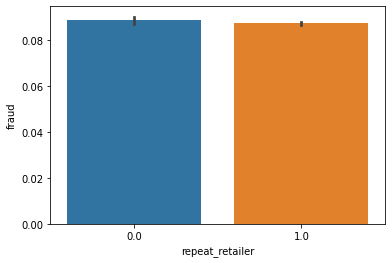

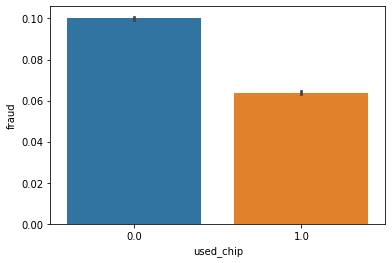

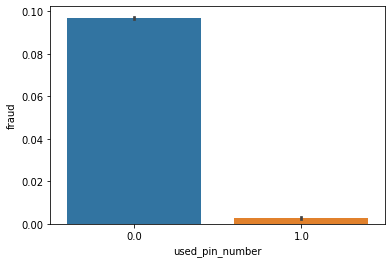

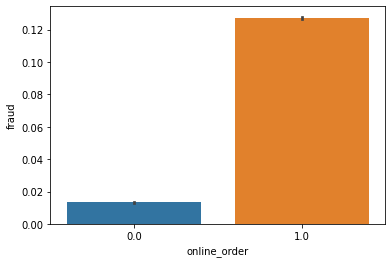

In [18]:
for feature in num_fea:
    if feature != 'fraud':
        sns.barplot(x=df[feature],y=df['fraud'])
        plt.show()

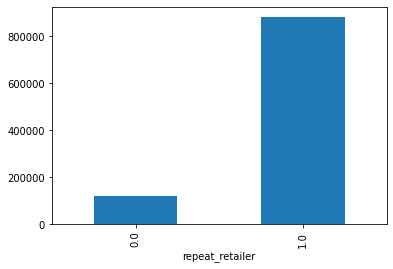

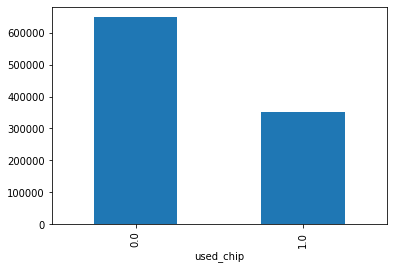

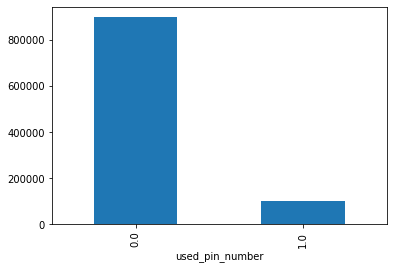

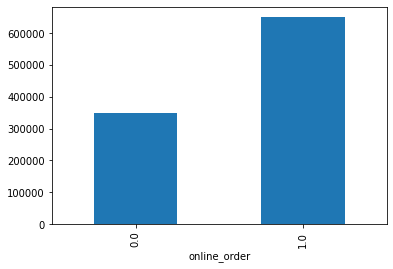

In [19]:
for feature in num_fea:
    if feature != 'fraud':
        df.groupby(feature)['fraud'].count().plot.bar()
        plt.show()

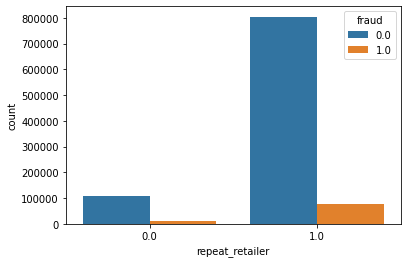

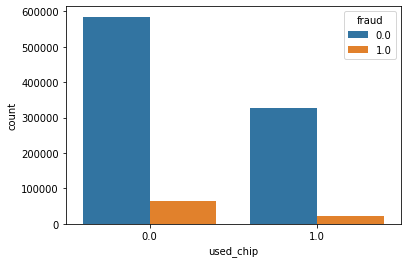

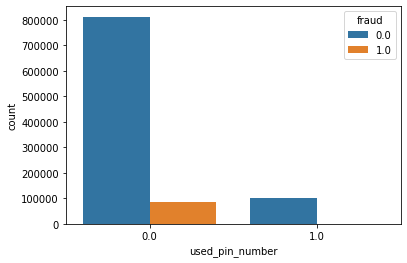

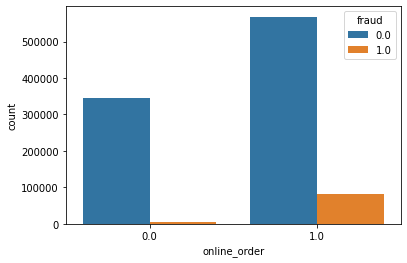

In [20]:
for feature in num_fea:
    if feature != 'fraud':
        sns.countplot(x=df[feature],hue=df['fraud'])
        plt.show()

1. person who repeat retailer valye 1 has more fraud data than 0
2. person who dose not used chip has more no of fraud
3. person who dose not use pin has more fraud data
4. person who do transaction by online has more chance to fraud

<AxesSubplot:xlabel='repeat_retailer', ylabel='used_pin_number'>

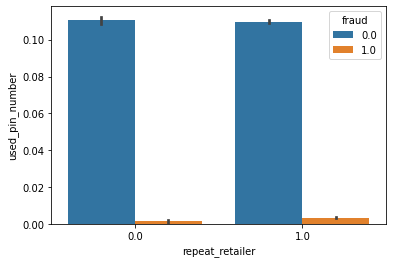

In [21]:
sns.barplot(x=df['repeat_retailer'],y=df['used_pin_number'],hue = df['fraud'])

<AxesSubplot:xlabel='repeat_retailer', ylabel='online_order'>

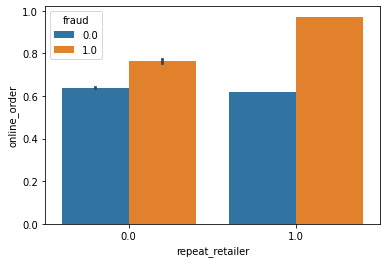

In [22]:
sns.barplot(x=df['repeat_retailer'],y=df['online_order'],hue = df['fraud'])

<AxesSubplot:xlabel='used_pin_number', ylabel='online_order'>

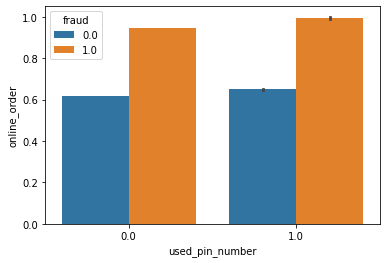

In [23]:
sns.barplot(x=df['used_pin_number'],y=df['online_order'],hue = df['fraud'])

<AxesSubplot:>

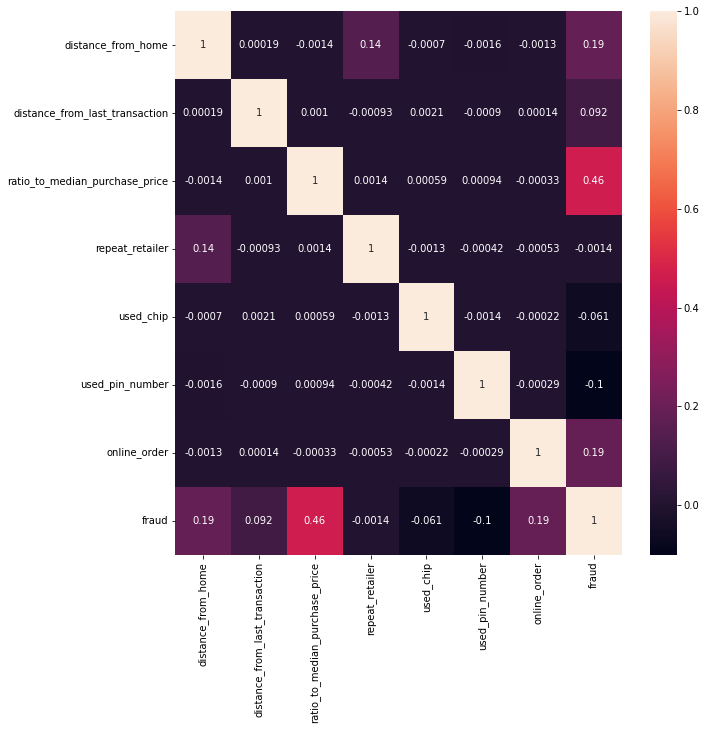

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# Distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

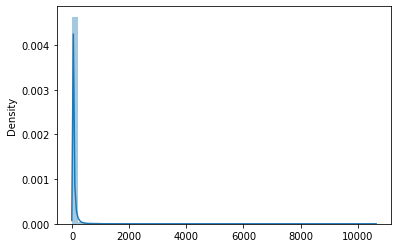

In [25]:
sns.distplot(x=df['distance_from_home'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

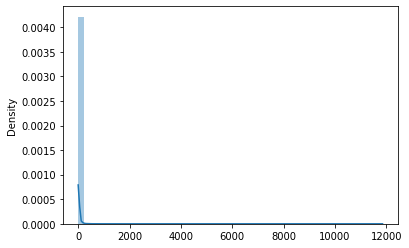

In [26]:
sns.distplot(x=df['distance_from_last_transaction'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

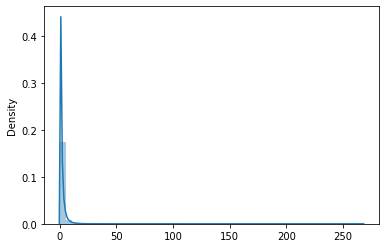

In [27]:
sns.distplot(x=df['ratio_to_median_purchase_price'])

In [28]:
data = df.copy()

In [29]:
l =[]
for i in df['distance_from_last_transaction']:
    if i !=0 :
        l.append(np.log10(i))

In [30]:
data['distance_from_last_transaction']=l

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

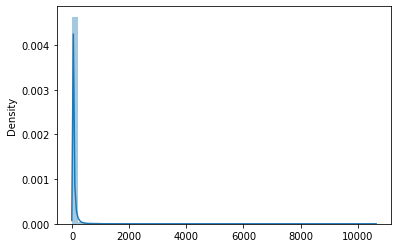

In [31]:
sns.distplot(x=data['distance_from_home'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

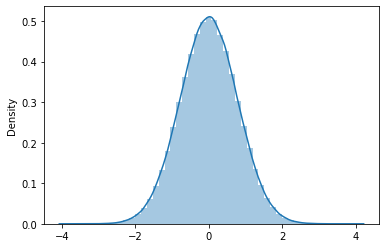

In [32]:
sns.distplot(x=data['distance_from_last_transaction'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

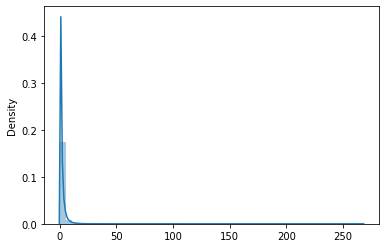

In [33]:
sns.distplot(x=data['ratio_to_median_purchase_price'])

# Outlier

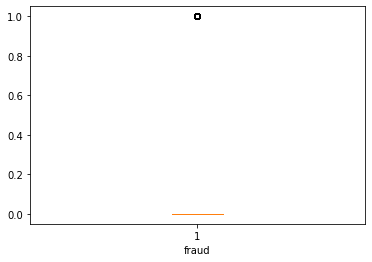

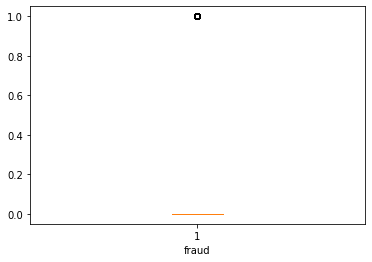

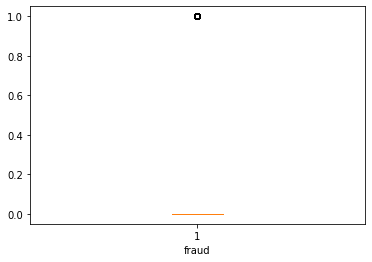

In [34]:
for i in cont_num:
    plt.boxplot(df[feature])
    plt.xlabel(feature)
    plt.show()

In [35]:
X = df.drop('fraud',axis=1)
y = df['fraud']

# feature selection

In [36]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [37]:
sel = SelectFromModel(ExtraTreeClassifier())
sel.fit(X,y)


SelectFromModel(estimator=ExtraTreeClassifier())

In [38]:
l = list(X.columns[sel.get_support()])

X = X[l]

In [39]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
X_train.head()

,distance_from_home,ratio_to_median_purchase_price
506532,10.765062,0.210220
327991,2.896660,5.320762
715937,3.643442,1.947841
860726,12.966595,0.158173
78617,5.303473,0.331516


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
res = RandomForestClassifier()
res.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
pred= res.predict(X_test)
accuracy_score(y_test,pred)

0.9308233333333333

In [44]:
import pickle

In [45]:
pickle.dump(res,open('card2.pkl','wb'))

In [46]:
model_predict=pickle.load(open('card2.pkl','rb'))

In [47]:
df[df['fraud']==1]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [48]:
X_train.head()

,distance_from_home,ratio_to_median_purchase_price
506532,10.765062,0.210220
327991,2.896660,5.320762
715937,3.643442,1.947841
860726,12.966595,0.158173
78617,5.303473,0.331516


In [49]:
data = {
    'distance_from_home':2.131956,
    'ratio_to_median_purchase_price':6.358667
}

In [50]:
s = list(data.values())

In [51]:
model_predict.predict([s])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1.])

In [52]:
df1=pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')

In [53]:
df1[df1['fraud']==1]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0
